### Imports

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Parte 1

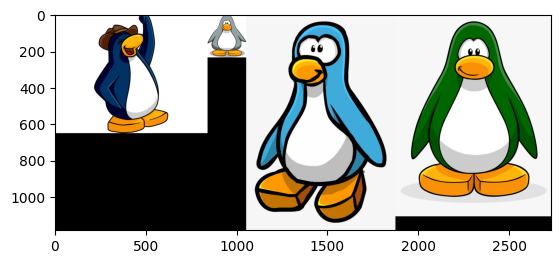

In [4]:
p1 = Image.open('P1.png')
p2 = Image.open('P2.png')
p3 = Image.open('P3.jpg')
p4 = Image.open('P4.png')

# Somando as larguras para descobrir a largura total da imagem no fim
total_width = p1.width + p2.width + p3.width + p4.width
# Verificando quem tem a maior altura
max_height = max(p1.height, p2.height, p3.height, p4.height)

# Criando imagem com a largura e altura obtida
image_junction = Image.new('RGB', (total_width, max_height))
# Colando cada imagem anterior na nova, sempre incrementando o ponto zero
image_junction.paste(p1, (0,0))
image_junction.paste(p2, (p1.width,0))
image_junction.paste(p3, (p1.width + p2.width,0))
image_junction.paste(p4, (p1.width + p2.width + p3.width,0))

plt.imshow(image_junction)

# Parte 2

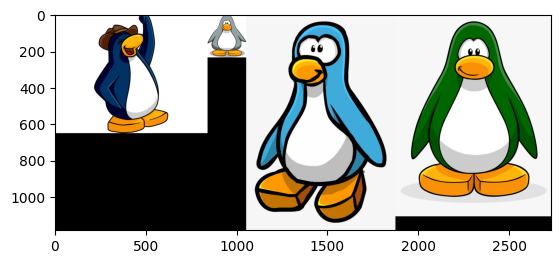

In [23]:
#Imagens alteradas de rgb para cmy
img_rgb = np.array(image_junction)
l, c, p = img_rgb.shape
img_cmy = np.zeros(shape=img_rgb.shape, dtype=np.float64)
for i in range(l): # itera sobre as linhas
    for j in range(c): # itera sobre as colunas

        #RGB
        r = img_rgb[i, j, 0] # pega o componente vermelho
        g = img_rgb[i, j, 1] # pega o componente verde
        b = img_rgb[i, j, 2] # pega o componente azul
        
        #CMY
        img_cmy[i, j, 0] = (255 - r) / 255 # Calcula ciano e o armazena na nova imagem
        img_cmy[i, j, 1] = (255 - g) / 255 # Calcula magenta e o armazena na nova imagem
        img_cmy[i, j, 2] = (255 - b) / 255 # Calcula amarelo e o armazena na nova imagem

#Importado para array de forma diferente. Segue tópico no Stackoverflow:
#https://stackoverflow.com/questions/55319949/pil-typeerror-cannot-handle-this-data-type
img_colorida = Image.fromarray((img_cmy * 255).astype(np.uint8))
img_colorida.save('alterar_cor.png')
plt.imshow(img_colorida)

# Parte 3

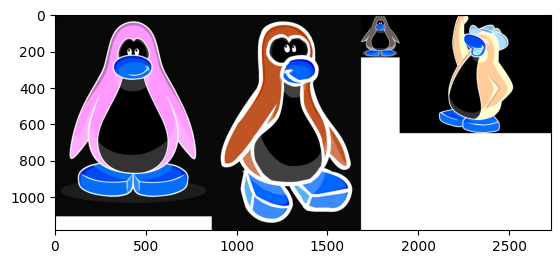

In [14]:
image_junction = Image.open("alterar_cor.png")
image_junction_array = np.array(image_junction)
(l, c, p) = image_junction_array.shape
img_espelho = np.zeros(shape=image_junction_array.shape, dtype=np.uint8)
for i in range(l): #  itera sobre as linhas
    for j in range(c): #  itera sobre as colunas
        new_x = -j # responsável por fazer a reflexão em Y (espelhamento)
        new_y = i
        img_espelho[new_y, new_x] = image_junction_array[i, j]

plt.imshow(img_espelho)

# Parte 4

212


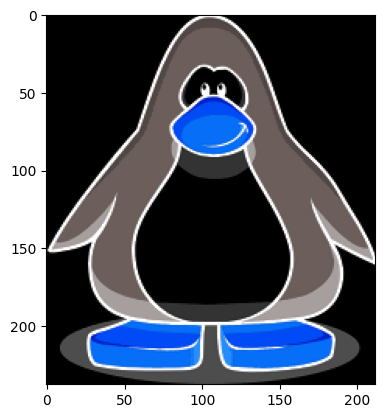

In [15]:
img_espelho = Image.fromarray(img_espelho)

width_to_not_show = p3.width + p4.width
# Realiza um crop na imagem
# A variável width_to_not_show ajuda a retirar a parte não necessária no recorte
# .crop(left, top, right, bottom)
# Segue tutorial: https://www.geeksforgeeks.org/python-pil-image-crop-method/
img_favorita = img_espelho.crop((width_to_not_show, 0, width_to_not_show + p2.width, p2.height))

plt.imshow(img_favorita)

# Parte 5

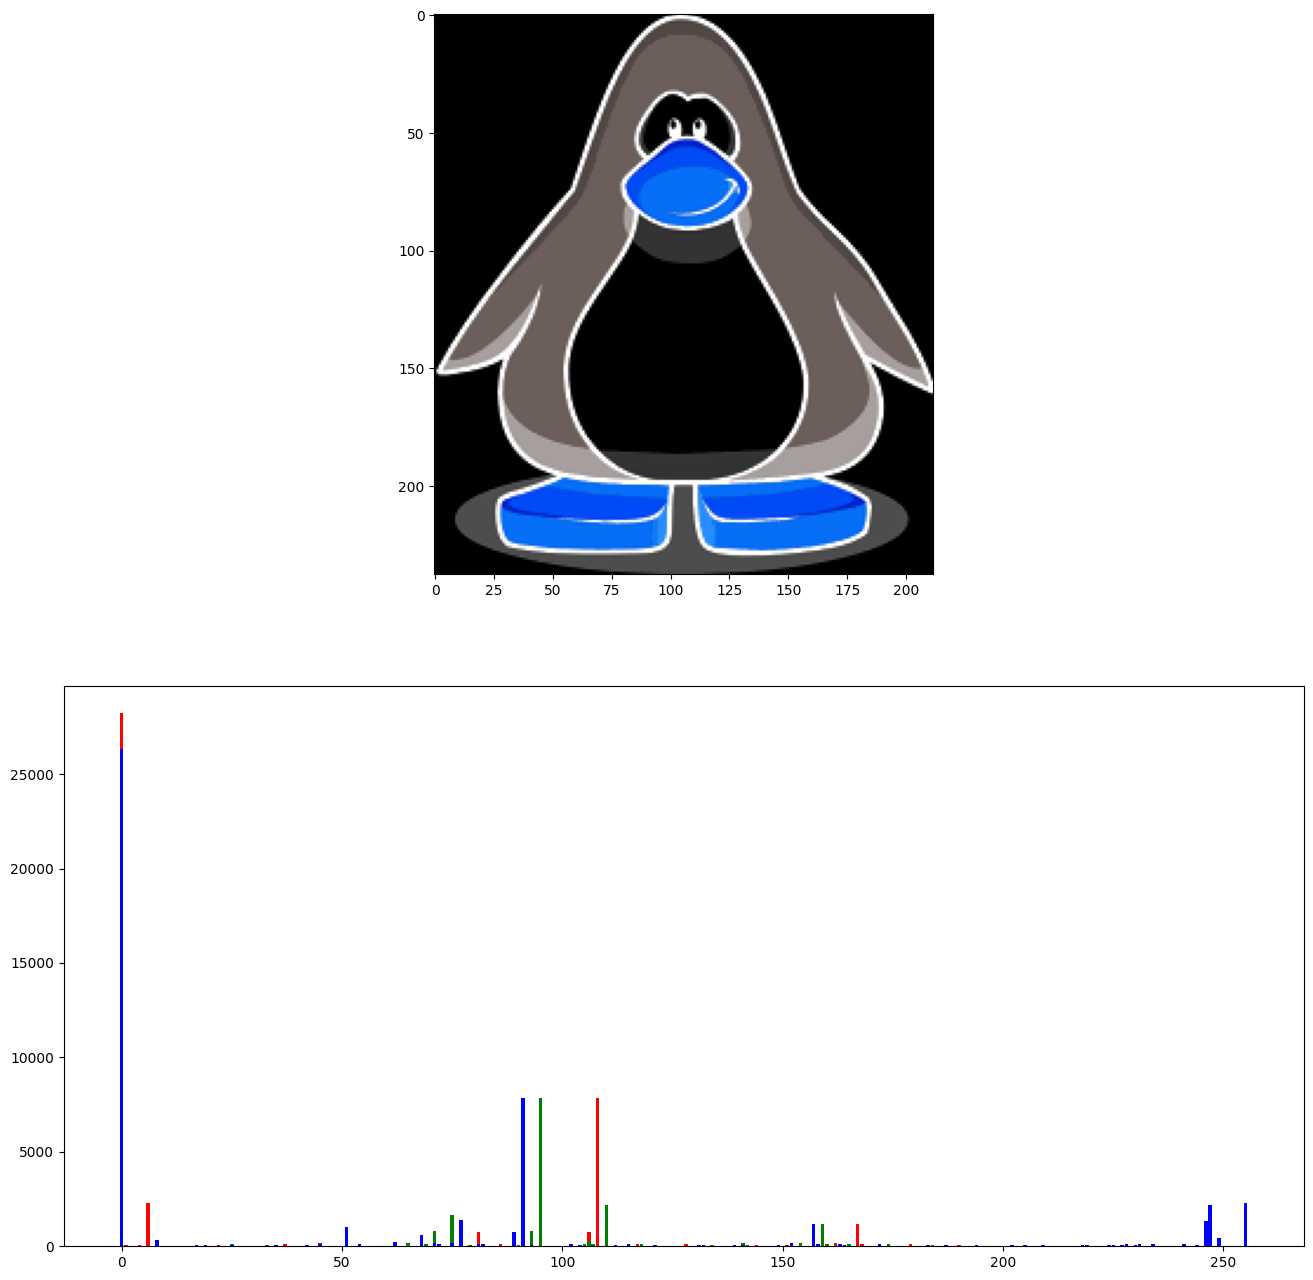

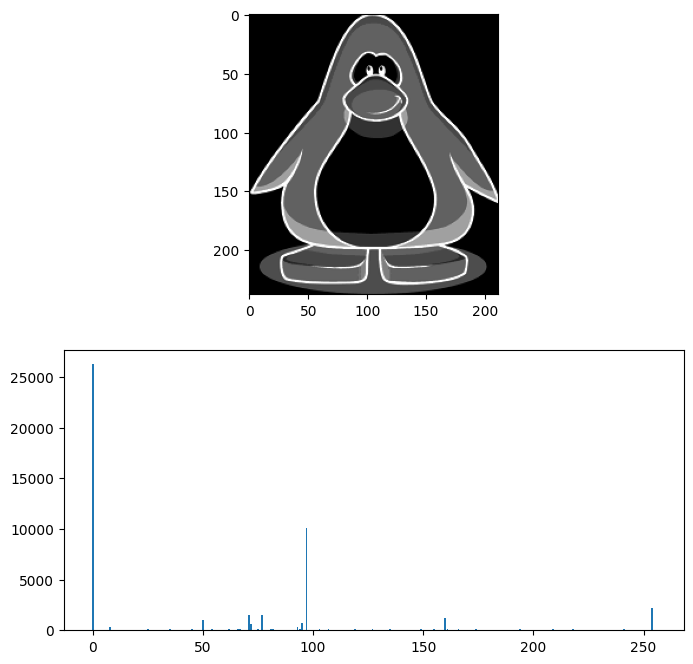

In [18]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

img_favorita_array = np.array(img_favorita)
show_histogram(img_favorita_array)

img_gray = ((0.2126 * img_favorita_array[:, :, 0]) + (0.7152 * img_favorita_array[:, :, 1]) + (0.0722 * img_favorita_array[:, :, 2])).astype(np.uint8)
histogram = show_histogram_gray(img_gray)

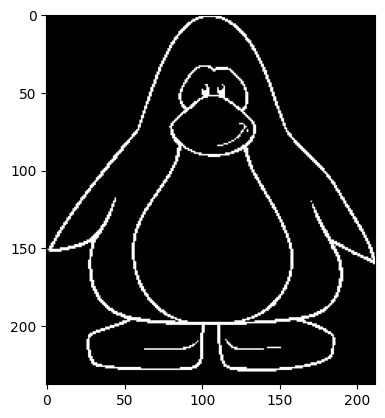

In [20]:
# Utilizando o threshold = 180 é possivel fazer o recorte do pinguin ja que a coloração do background consta na faixa de 0-180
threshold = 180

img_threshold = np.where(img_gray > threshold, 255, 0).astype(np.uint8)
plt.imshow(img_threshold, cmap="gray")

plt.show()

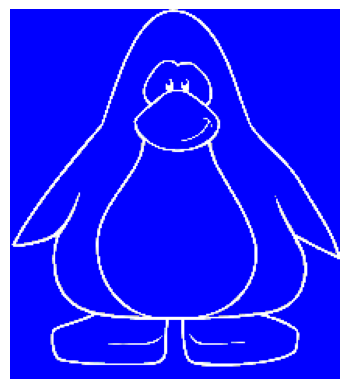

In [22]:
blue_in_rgb = [0, 0, 255]  # Azul em RGB

for i in range(img_favorita_array.shape[0]):  # Iterar sobre as linhas
    for j in range(img_favorita_array.shape[1]):  # Iterar sobre as colunas
        if img_gray[i, j] < threshold:
            img_favorita_array[i, j] = blue_in_rgb  # Pintar de azul
plt.imshow(img_favorita_array)
plt.axis('off')
plt.show()